# Very little, almost nothing, on the nature of deep learning

<img src="deeper_learning.png" alt="Nested" width="700"/>

## The TL;DR of deep learning

>\[Deep learnng] is a type of machine learning, a technique that enables computer systems to improve with experience and data. \[...] \[M]achine learning is the only viable approach to building AI systems that can operate in complicated real-world environments. Deeep learning is a particular kind of machine learning that achieves great power and flexibility by representing the world as a nested hierarchy of concepts, with each concept defined in terms of simpler concepts, and more abstract representations computed in terms of less abstract ones. (8)
>
> –– <cite>Goodfellow at al. (2016)</cite>

<img src="DL.png" alt="Nested" width="700"/>

Goodfellow, I., Bengio, Y, and Courville, A. (2016). <i>Deep Learning</i>. Cambridge MA: The MIT Press.

<div style="background-color: #ffffff; padding: 10px; border-radius: 5px;">

## 1. The basic until of learning: The artificial neuron

Let's create  the most basic possible neural network: A switch that turns on a light when the environment gets sufficiently dark. The elements of this system are as follows:

* <b>An input signal, $x$</b>: The light guage
* <b>A weight, $w$</b>: The negative value of the light signal (the brighter the light, the smaller the weight)
* <b>A bias, $b$</b>: The propensity of the neuron to fire
* <b>A summation function, $z$</b>: The combination of the input signal, the weight, and the bias
* <b>An activation function, $f(z)$</b>: Determines the level at which the neuron fires or not

![neuron](neuron.png)

### Sunshine
<img src="sun.png" alt="Nested" width="200"/>


* $x = 100$ lumens
* $w = (-1)$
* $b = 50$ units
* $z = -1 \cdot 100+50 = -50$ units
* $f(z) = \text{(Keep light OFF (0))}$

### Moonshine

<img src="moon.png" alt="Nested" width="200"/>

* $x = 5$ lumens
* $w = (-1)$
* $b = 50$ units
* $z = -1 \cdot 5+50 = 45$ units
* $f(z) = \text{(Turn light ON (I))}$

</div>

## 2. Networks of neurons

In the previous example, it is easy to establish a rule for when the light should be switched on. Once we know the threshold (here, 0), we can adjust the weight and/or the bias to ensure that the light goes on or off when the threshold is crossed. But in many siutuations we cannot do this: at best, we have a fuzzy heuristic that guides us rather than a precise rule that we can easily communicate. How do we solve this problem?

> <b>Deep learning</b> resolves this issues by <i>learning from examples</i>. That is, it takes a neural network with random weights and random biases, and adjusts these weights and biases until the network generates the same outputs as the training examples. For this, a single neuron is not enough––on grounds of both efficiency and its [inability to learn complex, non-linear functions like $XOR$ (exclusive $OR$)](https://automaticaddison.com/linear-separability-and-the-xor-problem/). 

Instead, neurons are aggregated into networks that consist of multiple inputs and least two––though usually more––neurons in the hidden layer. The outputs of the hidden layer are passed to the final layer, which uses an activation function to pick one of the outputs. In the network below, there are three inputs and five neurons in the hidden layer. The activation function––here, the sigmoid function––takes the states of the neurons in the hidden layer and maps it into a probability. Consider the network below, which could be used for a binary classification task:

![five_neuron](nn.png)

Though it seems complicated, it is strinctly analagous with the single neuron example––the only difference is that the second network sums up the weights and biases to produce the output. Specifically, there are three inputs which feed forward to a hidden layer of five neurons by way of 15 weighted connections. The activation function generates an output, $z_n$ by summing across all the inputs and adding the bias for each neuron: $z_n = \sum_{i=1}^{3}{w_{in}+b_n}$. Each of the values $z_n$ is then combined into a single value, $z$, that is passed to the output layer. In this example, the activation function is the signmoid function:

$$y = \frac{1}{1 + e^{-z}}$$

This function is useful for binary classificaiton because it forces any number into the $[0,1]$ interval. Values great than $0.5$ can then be intepreted as the probability of a positive classification being true, and values less than $0.5$ as the probability of a negative classification being true.



$f(z) = \begin{cases} 
1, & \text{if } z \geq 0 \quad \text{(Turn light ON (I))} \\  
0, & \text{if } z < 0 \quad \text{(Keep light OFF (O))}
\end{cases}$

## $w_{21}$
## $w_{22}$
## $w_{23}$

## $w_{24}$
## $w_{25}$


## $w_{24}$
## $w_{34}$
## $y = f(z)$

## $$z_1 = \sum_{i=1}^{3}{w_{i1}+b_1}$$

## $$z_3 = \sum_{i=1}^{3}{w_{i3}+b_3}$$

## $$z_5 = \sum_{i=1}^{3}{w_{i5}+b_5}$$

## $$y = \frac{1}{1 + e^{-z}}$$

## $$z = f(z_1, ..., z_5)$$


$$
\begin{aligned}
z_{\text{output}} &= w_{21} z_1 + w_{22} z_2 + w_{23} z_3 \\
&\quad + w_{24} z_4 + w_{25} z_5 + b_{\text{output}}
\end{aligned}
$$



## $y = \begin{cases} 1 \\  0 \end{cases}$

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Define the model architecture
model = models.Sequential([
    layers.Dense(5, activation='relu', input_shape=(3,)),  # Hidden layer with 5 neurons
    layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Generate dummy data (100 samples, 3 input features)
X_train = np.random.rand(100, 3)  # 100 samples, 3 features
y_train = np.random.randint(0, 2, size=(100, 1))  # 100 binary labels (0 or 1)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)

# Retrieve weights and biases
for layer in model.layers:
    weights, biases = layer.get_weights()
    print(f"\nLayer: {layer.name}")
    print(f"Weights:\n{weights}")
    print(f"Biases:\n{biases}")


/Users/james/opt/anaconda3/envs/right_word/lib/python3.9/site-packages/keras_preprocessing/image/affine_transformations.py:13: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.19.5)
  import scipy
2025-02-12 19:28:26.583859: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


2025-02-12 19:28:26.939108: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
10/10 [==============================] - 0s 856us/step - loss: 0.7275 - accuracy: 0.4300
Epoch 2/10
10/10 [==============================] - 0s 950us/step - loss: 0.7240 - accuracy: 0.4300
Epoch 3/10
10/10 [==============================] - 0s 1ms/step - loss: 0.7207 - accuracy: 0.4300
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 0.7180 - accuracy: 0.4600
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 0.7156 - accuracy: 0.4600
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 0.7130 - accuracy: 0.4600
Epoch 7/10
10/10 [==============================] - 0s 1ms/step - loss: 0.7111 - accuracy: 0.4600
Epoch 8/10
10/10 [==============================] - 0s 1ms/step - loss: 0.7094 - accuracy: 0.4500
Epoch 9/10
10/10 [==============================] - 0s 1ms/step - loss: 0.7075 - accuracy: 0.4500
Epoch 10/10
10/10 [==============================] - 0s 1ms/step - loss: 0.7059 - accuracy: 0.4600

Layer: dense
W

In [2]:
import spacy
import pandas as pd

# Load the medium language model
nlp = spacy.load("en_core_web_md")


words = [
        # 🍕 Food words (1)
        "apple", "banana", "carrot", "bread", "cheese", "chicken", "chocolate", "coffee", "cookie", "donut",
        "egg", "fish", "grape", "honey", "icecream", "jam", "ketchup", "lemon", "mango", "milk",
        "noodles", "orange", "pancake", "pepper", "pizza", "popcorn", "pumpkin", "rice", "salad", "salt",
        "sandwich", "sausage", "soup", "spaghetti", "spinach", "strawberry", "sugar", "sushi", "tea", "tomato",
        "turkey", "vanilla", "waffle", "watermelon", "yogurt", "zucchini", "beef", "pasta", "coconut", "burger",
        
        # 🚫 Non-food words (0)
        "car", "bottle", "chair", "laptop", "phone", "television", "pencil", "candle", "mirror", "window",
        "book", "notebook", "desk", "computer", "camera", "keyboard", "mouse", "lamp", "sofa", "door",
        "shoes", "sock", "jacket", "shirt", "trousers", "hat", "watch", "wallet", "backpack", "glasses",
        "earphones", "radio", "guitar", "piano", "violin", "painting", "clock", "newspaper", "magazine", "bicycle",
        "bus", "train", "plane", "ship", "road", "bridge", "building", "island", "mountain", "river"
    ]

classes = [
        # 🍕 1 for Food Words
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

        # 🚫 0 for Non-Food Words
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    ]

vectors = [nlp(i).vector for i in words]

vecs_df = pd.DataFrame(vectors)
vecs_df['word'] = words
vecs_df['label'] = classes










ImportError: cannot import name 'Self' from 'typing_extensions' (/Users/james/opt/anaconda3/envs/right_word/lib/python3.9/site-packages/typing_extensions.py)

In [2]:
vecs_df

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,word,label
0,-1.00840,-2.03080,-0.64185,2.69280,0.31771,-2.6662,-3.737200,5.47140,-5.17510,0.51958,...,2.06100,-3.4056,-2.80990,-0.637860,4.28870,0.59301,0.99132,-0.82037,apple,1
1,0.20778,-2.41510,0.36605,2.01390,-0.23752,-3.1952,-0.295200,1.22720,-3.41290,-0.54969,...,1.83150,-1.4257,-1.68610,-0.519530,1.76350,-0.50722,1.38800,-1.10120,banana,1
2,0.73818,0.35021,-1.48600,1.36960,-0.75782,-3.2421,-2.824100,0.18474,-4.88070,1.76320,...,0.81671,-3.1405,0.38924,1.934200,3.08860,-0.35944,0.11533,0.46199,carrot,1
3,-2.12600,-4.26920,-0.79904,1.58110,2.63000,-5.6096,1.677300,5.72570,-5.36660,0.60170,...,-0.34549,-7.3201,0.49049,-0.051855,2.94230,2.28000,2.79970,-1.13930,bread,1
4,1.38840,-1.34810,-1.76380,-0.32299,2.89680,-3.4742,1.561400,4.10190,-2.33390,0.77066,...,1.48450,-7.4707,-1.99180,0.120510,3.49800,5.46100,2.15460,0.67850,cheese,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-3.57450,3.84440,1.60100,-2.85680,2.04890,0.7091,4.074900,3.02930,-2.82620,6.48830,...,4.62680,4.0875,2.09110,1.675300,1.12220,1.03150,3.04830,2.73020,bridge,0
96,-2.68510,-3.00210,-2.28180,-2.97000,1.99640,-3.0772,3.391000,4.50660,-2.46250,3.42800,...,-4.36430,3.7499,0.96692,0.567220,-0.72506,-2.10500,1.54140,1.82390,building,0
97,-5.46380,1.31280,0.82809,-3.26310,3.34530,1.3367,1.907400,2.13840,0.23944,4.54920,...,0.88157,6.7691,-2.23060,3.599200,-2.37380,-4.55100,-3.55800,4.10650,island,0
98,0.58298,3.22000,-4.16760,-2.00530,4.13750,1.7788,-0.046562,3.75320,0.20599,1.29270,...,2.27280,2.0418,-0.36199,1.552400,1.31820,-0.54214,-1.26300,1.63990,mountain,0


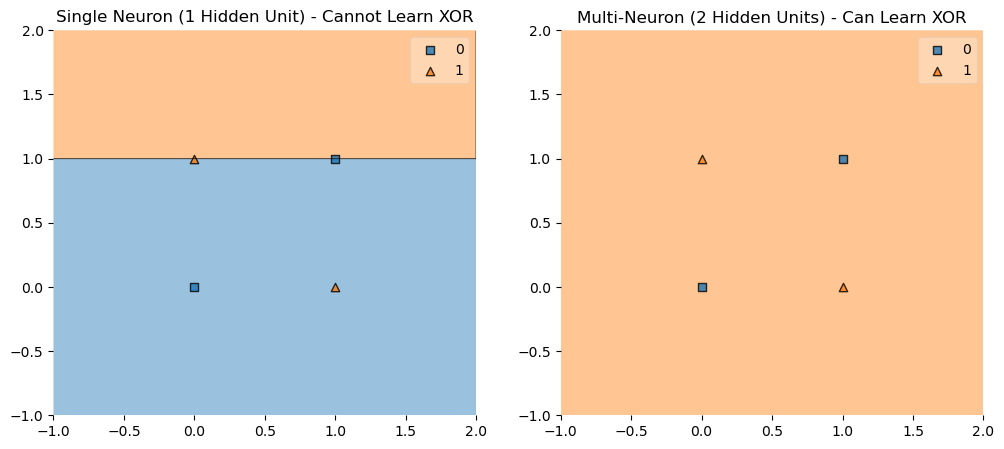

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from mlxtend.plotting import plot_decision_regions

# Generate XOR data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 1, 1, 0])  # XOR outputs

# Train a single-layer (1 neuron) neural network
single_neuron_model = MLPClassifier(hidden_layer_sizes=(1,), activation='relu', max_iter=1000, random_state=42)
single_neuron_model.fit(X, y)

# Train a multi-neuron (2 neurons) neural network
multi_neuron_model = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', max_iter=1000, random_state=42)
multi_neuron_model.fit(X, y)

# Plot decision boundaries
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Single neuron decision boundary
ax[0].set_title("Single Neuron (1 Hidden Unit) - Cannot Learn XOR")
plot_decision_regions(X, y, clf=single_neuron_model, ax=ax[0])

# Multi-neuron decision boundary
ax[1].set_title("Multi-Neuron (2 Hidden Units) - Can Learn XOR")
plot_decision_regions(X, y, clf=multi_neuron_model, ax=ax[1])

plt.show()


In [2]:
import numpy as np
z = np.array([0.5, -1.2, 2.3, 0.0, 1.5])  

# Apply the sigmoid activation function element-wise
sigmoid_output = 1 / (1 + np.exp(-z))

print(sigmoid_output)


[0.62245933 0.23147522 0.90887704 0.5        0.81757448]


In [3]:
sum(sigmoid_output)

3.0803860628816246